In [1]:
# import datetime,pandas,seaborn,pyplot, and etc.,
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# read excel from file path， check the data head
df = pd.read_excel(r'C:\Users\zhuoxun.yang001\Downloads\副本巴中中支.xlsx', sheet_name = '承保清单')
df.head(5)


,机构代码,二级机构名称,三级机构名称,四级机构名称,业务员工号,业务员姓名,营销人员特性,营销经理代码,营销经理名称,分区经理代码,分区经理姓名,总监代码,总监姓名,业务员入司日期,保单号,投保单号,险种名称,险种序号,缴费周期,缴别,缴费期限,保障期限,承保日期,追加日期,契撤日期,回执日期,保障起保日,保单状态,无效原因,自保互保标志,自保互保标志2,业务来源,保单保费,保单保额,收费金额,实际缴费方式,缴费人姓名,银行账号,开户银行,记账日期,投保人姓名,投保人客户号,被保人姓名,被保人客户号,受益人姓名,受益人代码,受益比率,受益人与被保险人关系,预收日期,回访日期,保单内部标保2010版,综合标保,承保手续费,犹豫期截止日,是否需录音录像,是否录制视频,可回溯审核是否通过,被保人生日,被保人工作单位,被保人国籍,被保人婚姻状况,被保人性别,被保人证件号码,被保人证件类型,被保人职业,承保时联系方式,家庭电话号码,收费地址,受益人证件号码,受益人证件类型,投保人工作单位,投保人国籍,投保人婚姻状况,投保人生日,投保人性别,投保人证件号码,投保人证件类型,投保人职业,业务员身份证号,最新联系方式
0,86511921,富德生命人寿保险股份有限公司四川分公司,富德生命人寿保险股份有限公司四川分公司巴中中心支公司,富德生命人寿保险股份有限公司巴中中心支公司通江营销服务部,I000000000069539,张克容,个险营销员,I00773000422,通江,I00773000422,通江,I00773000422,通江,2014-05-13,P000000089769853,1186020988130738,富德生命富赢三号年金保险,1,年,年满期-缴几年,3,10,2021-01-04 16:37:40,NaN,NaN,2021-01-15,2021-01-05,有效,NaN,否,不是自保件,移动签单,50000,6700.00000,100000.00000,转账,敖林华,6221886758010587069,中国邮政储蓄银行有限责任公司四川省巴中市通江县支行,2021-01-04 16:07:23,敖林华,C00058388844,敖林华,C00058388844,"敖林华,蔡佳成","B00019363119,B00031359735",1,"本人,子女",2021-01-04 16:07:23,2021-01-19 12:40:20,15000.00000,20000.00000,6000.00000,2021-02-02,否,否,未上传材料,1989-09-17,无,中国,已婚,女性,513721198909170327,居民身份证,农民,19983691789,NaN,中国四川省巴中市通江县青浴乡姜家坝村五社205号,"513721198909170327,511921201010130275","居民身份证,居民户口簿",无,中国,已婚,1989-09-17,女性,513721198909170327,居民身份证,农民,513025196711050328,19983691789.00000
1,86511922,富德生命人寿保险股份有限公司四川分公司,富德生命人寿保险股份有限公司四川分公司巴中中心支公司,富德生命人寿保险股份有限公司四川分公司巴中中心支公司南江营销服务部,I000000000393794,杜秀芬,个险营销员,I000000000393794,杜秀芬,I00773001079,何建华,I00773001069,南江,2016-11-17,P000000089769094,1186020984857606,富德生命富赢三号年金保险,1,年,年满期-缴几年,5,10,2021-01-04 16:34:54,NaN,NaN,2021-01-13,2021-01-05,有效,NaN,否,不是自保件,移动签单,20000,3600.00000,40000.00000,转账,党双绪,6236684220014195078,中国建设银行股份有限公司南江支行,2021-01-04 15:57:34,党双绪,C00067636654,党双绪,C00067636654,"法定继承人,党双绪","B00000000001,B00024430639",1,"其他,本人",2021-01-04 15:57:34,2021-01-14 17:14:33,10000.00000,12000.00000,4000.00000,2021-01-29,否,否,未上传材料,1973-02-20,无,中国,已婚,男性,513026197302202934,居民身份证,农民,17780759792,NaN,中国四川省巴中市南江县天池镇百岁村5社3号,513026197302202934,"其他证件,居民身份证",无,中国,已婚,1973-02-20,男性,513026197302202934,居民身份证,农民,513026197609126040,17780759792.00000
2,86511900,富德生命人寿保险股份有限公司四川分公司,富德生命人寿保险股份有限公司四川分公司巴中中心支公司,富德生命人寿保险股份有限公司巴中中心支公司本级营销服务部,I000000001215572,李会琼,个险营销员,I00773002654,龙秀华,I00773002654,龙秀华,I00773000002,董俊华,2020-12-21,P000000089763338,1186020990096439,富德生命如意宝终身寿险（万能型）,1,趸,趸缴-缴费期填0,0,999,2021-01-04 15:02:43,NaN,NaN,2021-01-08,2021-01-05,有效,NaN,是,显性自保件,NaN,100,100.00000,100.00000,转账,李会琼,6217996758006461845,中国邮政储蓄银行有限责任公司四川省巴中市通江县支行,2021-01-04 15:02:40,李会琼,C00090709783,李会琼,C00090709783,法定继承人,B00000000001,1,其他,2021-01-05,2021-01-08 20:53:44,0.00000,0.00000,NaN,2021-01-26,否,否,未上传材料,1975-02-23,富德生命人寿,中国,已婚,女性,513027197502231920,居民身份证,农民,17760155687,NaN,中国四川省巴中市巴州区凯悦名城B区14栋1-5,NaN,其他证件,富德生命人寿,中国,已婚,1975-02-23,女性,513027197502231920,居民身份证,农民,513027197502231920,17760155687.00000
3,86511922,富德生命人寿保险股份有限公司四川分公司,富德生命人寿保险股份有限公司四川分公司巴中中心支公司,富德生命人寿保险股份有限公司四川分公司巴中中心支公司南江营销服务部,I000000000772098,李含菊,个险营销员,I000000000772098,李含菊,I00773001079,何建华,I00773001069,南江,2018-05-18,P000000089702588,1186020969859308,富德生命如意宝终身寿险（万能型）,1,趸,趸缴-缴费期填0,0,999,2021-01-02 18:35:12,NaN,NaN,2021-01-11,2021-01-03,有效,NaN,否,不是自保件,移动签单,100,100.00000,100.00000,转账,冯殿全,6217976758005285603,中国邮政储蓄银行有限责任公司四川省巴中市通江县支行,2020-12-28 15:01:47,冯殿全,C00064521242,冯殿全,C00064521242,李春梅,B00026601824,1,配偶,2020-12-28 15:01:47,2021-01-18 18:25:30,0.00000,0.00000,NaN,2021-01-27,否,否,未上传材料,1971-10-12,无,中国,已婚,男性,513026197110126332,居民身份证,农民,18190142789,NaN,中国四川省巴中市南江县关田乡西坪村三社,513721198704200481,居民身份证,无,中国,已婚,1971-10-12,男性,513026197110126332,居民身份证,农民,513026197409016349,18190142789.00000
4,86511922,富德生命人寿保险股份有限公司四川分公司,富德生命人寿保险股份有限公司四川分公司巴中中心支公司,富德生命人寿保险股份有限公司四川分公司巴中中心支公司南江营销服务部,I000000000979618,刘兵,个险营销员,I00773001079,何建华,I00773001079,何建华,I00773001069,南江,2019-03-28,P000000089929855,1186020996136642,富德生命康健无忧重大疾病保险（经典版）,1,年,年满期-缴几年,15,999,2021-01-09 15:58:42,NaN,NaN,2021-01-20,2021-01-10,有效,NaN,否,不是自保件,移动签单,8865,150000.00000,17730.00000,转账,付传喜,6221886758015735853

In [3]:
# check how many unique of products in dataframe
df["险种名称"].nunique()

46

In [4]:
# check how many unique customers 
df['投保人客户号'].nunique()

2646

In [5]:
# check how many unique numbers 
df['投保单号'].nunique()

4636

In [6]:
# check unique insurance invoice
df['保单号'].nunique()

4636

In [7]:
# quantify the monetary value 
df['money'] = df['保单保费']

In [8]:
# quantify monetary value with 综合标保
df['money_zhbb'] = df['综合标保']

In [9]:
# group monetary value by 投保单号 
df.groupby("保单号").agg({"money":"sum"}).head() 

,money
保单号,
P000000000141252,20000
P000000000307307,75000
P000000000522635,100000
P000000000583239,20000
P000000001102215,60000


In [10]:
# group monetary value by 保单号 
df.groupby("保单号").agg({"money_zhbb":"sum"}).head() 

,money_zhbb
保单号,
P000000000141252,0.00000
P000000000307307,0.00000
P000000000522635,0.00000
P000000000583239,0.00000
P000000001102215,0.00000


In [11]:
# group monetary value by 险种名称 and sort index in price following descending order
df.groupby("险种名称").agg({"保单保费":"max"}).sort_values("保单保费", ascending = False).head()

,保单保费
险种名称,
富德生命如意宝终身寿险（万能型）,2000000
富德生命附加金管家C款年金保险（万能型）（2016版）,500000
富德生命富赢三号年金保险,360000
富德生命附加金管家B款年金保险（万能型）,300000
富德生命附加富赢一号年金保险（万能型）,230000


In [12]:
# check the null values
df.isnull().sum() 

机构代码               0
二级机构名称             0
三级机构名称             0
四级机构名称             0
业务员工号              0
业务员姓名              0
营销人员特性             0
营销经理代码             0
营销经理名称             0
分区经理代码             0
分区经理姓名             0
总监代码               0
总监姓名               0
业务员入司日期            0
保单号                0
投保单号               0
险种名称               0
险种序号               0
缴费周期               0
缴别                 0
缴费期限               0
保障期限               0
承保日期             282
追加日期           10111
契撤日期           10383
回执日期               0
保障起保日              0
保单状态               0
无效原因            9875
自保互保标志             0
自保互保标志2            0
业务来源            2841
保单保费               0
保单保额             180
收费金额              23
实际缴费方式             1
缴费人姓名              0
银行账号               0
开户银行               0
记账日期               0
投保人姓名              0
投保人客户号             0
被保人姓名              0
被保人客户号             0
受益人姓名              5
受益人代码              5
受益比率               5
受益人与被保险人关系   

In [13]:
# subset the columns to create new dataset
df1 = df[['机构代码', '二级机构名称', '保单号','投保单号','险种名称','险种序号','承保日期','投保人姓名','被保人姓名',
          '投保人客户号', '银行账号','money']]

In [14]:
# check the null value and sum up
df1.isnull().sum()

机构代码        0
二级机构名称      0
保单号         0
投保单号        0
险种名称        0
险种序号        0
承保日期      282
投保人姓名       0
被保人姓名       0
投保人客户号      0
银行账号        0
money       0
dtype: int64

In [15]:
# drop the null value, name of subset listed below
df2 = df1.dropna(subset=['承保日期'])

In [16]:
# make sure the null value has been droped
df2.isnull().sum()

机构代码      0
二级机构名称    0
保单号       0
投保单号      0
险种名称      0
险种序号      0
承保日期      0
投保人姓名     0
被保人姓名     0
投保人客户号    0
银行账号      0
money     0
dtype: int64

In [17]:
# check the dtype & counts of dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10111 entries, 0 to 10110
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   机构代码    10111 non-null  int64 
 1   二级机构名称  10111 non-null  object
 2   保单号     10111 non-null  object
 3   投保单号    10111 non-null  int64 
 4   险种名称    10111 non-null  object
 5   险种序号    10111 non-null  int64 
 6   承保日期    10111 non-null  object
 7   投保人姓名   10111 non-null  object
 8   被保人姓名   10111 non-null  object
 9   投保人客户号  10111 non-null  object
 10  银行账号    10111 non-null  uint64
 11  money   10111 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.0+ MB


In [18]:
# import numpy alias as np
import numpy as np

In [19]:
# parsed the data by coerce transformation, in order to be processed
df2['date_parsed'] = pd.to_datetime(df2['承保日期'],
                                    infer_datetime_format=True,
                                    errors='coerce')

C:\Users\zhuoxun.yang001\AppData\Local\Temp\ipykernel_27224\1968139672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date_parsed'] = pd.to_datetime(df2['承保日期'],


In [20]:
#set up Recency Metric
import datetime as dt
today_date = dt.datetime(2022,5,1)
df2['hist'] = today_date - df2['date_parsed']
# then convert subset categories to timedelta64
df2['hist'].astype('timedelta64[D]')
# then applying timedelta of numpy to convert to days
df2['hist'] = df2['hist'] / np.timedelta64(1,'D')
recency_df = df2.groupby('投保人客户号').agg({'hist' :lambda x:round(x.min())})
recency_df.rename(columns={"hist": "Recency"}, inplace = True)

C:\Users\zhuoxun.yang001\AppData\Local\Temp\ipykernel_27224\4180009082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hist'] = today_date - df2['date_parsed']
C:\Users\zhuoxun.yang001\AppData\Local\Temp\ipykernel_27224\4180009082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hist'] = df2['hist'] / np.timedelta64(1,'D')


In [21]:
#  list recency 
recency_df.head(5)

,Recency
投保人客户号,
C00000439821,251
C00000442492,4
C00000458038,483
C00000474142,277
C00000481321,194


In [22]:
# check the null values in recency
recency_df.isnull().sum()

Recency    0
dtype: int64

In [23]:
# Frequency Metric
temp_df = df.groupby(["投保人客户号","保单号"]).agg({"保单号":"count"})
freq_df = temp_df.groupby("投保人客户号").agg({"保单号":"count"})
freq_df.rename(columns={"保单号": "Frequency"}, inplace = True)

In [24]:
# listed the frequency
freq_df.head(5)

,Frequency
投保人客户号,
C00000439821,1
C00000442492,3
C00000458038,1
C00000474142,1
C00000481321,2


In [25]:
# check the null value and sum up
freq_df.isnull().sum()

Frequency    0
dtype: int64

In [26]:
# Monetary Metric
monetary_df = df.groupby("投保人客户号").agg({"money":"sum"})
monetary_df.rename(columns = {"money": "Monetary"}, inplace = True)
monetary_df.head(5)

,Monetary
投保人客户号,
C00000439821,8955
C00000442492,8882
C00000458038,5710
C00000474142,3058
C00000481321,120100


In [27]:
# check the null value and sum up
monetary_df.isnull().sum()

Monetary    0
dtype: int64

In [28]:
# concat three columns and drop null value in column recency
rfm = pd.concat([recency_df, freq_df, monetary_df], axis=1)
rfm = rfm.dropna(subset=['Recency'])
df3 = rfm
rfm.head(5)

,Recency,Frequency,Monetary
投保人客户号,,,
C00000439821,251.00000,1,8955
C00000442492,4.00000,3,8882
C00000458038,483.00000,1,5710
C00000474142,277.00000,1,3058
C00000481321,194.00000,2,120100


In [29]:
# check the dtype and counts
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2527 entries, C00000439821 to C00095610048
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    2527 non-null   float64
 1   Frequency  2527 non-null   int64  
 2   Monetary   2527 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 79.0+ KB


In [30]:
# make sure no null value
rfm.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [31]:
# quantile the recency, frequency, monetary, and combine them and set their data type to string
df3["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
df3["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels = [1,2,3,4,5])
df3["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1,2,3,4,5])
df3["RFM_SCORE"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

In [32]:
# check the head
df3.head(5)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
投保人客户号,,,,,,,
C00000439821,251.00000,1,8955,3,1,4,314
C00000442492,4.00000,3,8882,5,5,4,554
C00000458038,483.00000,1,5710,1,1,3,113
C00000474142,277.00000,1,3058,3,1,1,311
C00000481321,194.00000,2,120100,4,3,5,435


In [33]:
# build up a value named seg_map, map the values to dataframe
seg_map = {
        r'[1-2][1-2]': '休眠客户',
        r'[1-2][3-4]': '流失客户_',
        r'[1-2]5': '重要挽留客户_',
        r'3[1-2]': '一般客户',
        r'33': '一般维持客户',
        r'[3-4][4-5]': '重要保持客户_',
        r'41': '潜力客户',
        r'51': '新客户',
        r'[4-5][2-3]': '重要发展客户_',
        r'5[4-5]': '重要价值客户_'
}



df3['用户分类'] = df3['RecencyScore'].astype(str) + df3['FrequencyScore'].astype(str)
df3['用户分类'] = df3['用户分类'].replace(seg_map, regex=True)
df3

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,用户分类
投保人客户号,,,,,,,,
C00000439821,251.00000,1,8955,3,1,4,314,一般客户
C00000442492,4.00000,3,8882,5,5,4,554,重要价值客户_
C00000458038,483.00000,1,5710,1,1,3,113,休眠客户
C00000474142,277.00000,1,3058,3,1,1,311,一般客户
C00000481321,194.00000,2,120100,4,3,5,435,重要发展客户_
C00000513354,11.00000,2,12790,5,3,4,534,重要发展客户_
C00000528260,455.00000,1,7685,1,1,3,113,休眠客户
C00000545398,78.00000,2,21720,5,3,5,535,重要发展客户_
C00000557564,404.00000,1,3998,2,1,2,212,休眠客户


In [34]:
# subset the columns
df4 = df3.loc[:,"Recency":"Monetary"]
print(df4.head(5))

               Recency  Frequency  Monetary
投保人客户号                                     
C00000439821 251.00000          1      8955
C00000442492   4.00000          3      8882
C00000458038 483.00000          1      5710
C00000474142 277.00000          1      3058
C00000481321 194.00000          2    120100


In [35]:
# group by 投保人客户号
df3.groupby("投保人客户号").agg({"用户分类": "sum"}).head()

,用户分类
投保人客户号,
C00000439821,一般客户
C00000442492,重要价值客户_
C00000458038,休眠客户
C00000474142,一般客户
C00000481321,重要发展客户_


In [36]:
# check the head of dataframe3
df3.head(5)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,用户分类
投保人客户号,,,,,,,,
C00000439821,251.00000,1,8955,3,1,4,314,一般客户
C00000442492,4.00000,3,8882,5,5,4,554,重要价值客户_
C00000458038,483.00000,1,5710,1,1,3,113,休眠客户
C00000474142,277.00000,1,3058,3,1,1,311,一般客户
C00000481321,194.00000,2,120100,4,3,5,435,重要发展客户_


In [37]:
rfm.head(5)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,用户分类
投保人客户号,,,,,,,,
C00000439821,251.00000,1,8955,3,1,4,314,一般客户
C00000442492,4.00000,3,8882,5,5,4,554,重要价值客户_
C00000458038,483.00000,1,5710,1,1,3,113,休眠客户
C00000474142,277.00000,1,3058,3,1,1,311,一般客户
C00000481321,194.00000,2,120100,4,3,5,435,重要发展客户_


In [38]:
# k-means clustering

In [39]:
# 
from sklearn import preprocessing

In [40]:
# apply sklearn preprocessing to encode label, transform to numerical value
rfm_encoded = rfm
le = preprocessing.LabelEncoder()
rfm_encoded['用户分类']=le.fit_transform(rfm_encoded['用户分类'])
print(rfm_encoded)

               Recency  Frequency  Monetary RecencyScore FrequencyScore  \
投保人客户号                                                                    
C00000439821 251.00000          1      8955            3              1   
C00000442492   4.00000          3      8882            5              5   
C00000458038 483.00000          1      5710            1              1   
C00000474142 277.00000          1      3058            3              1   
C00000481321 194.00000          2    120100            4              3   
C00000513354  11.00000          2     12790            5              3   
C00000528260 455.00000          1      7685            1              1   
C00000545398  78.00000          2     21720            5              3   
C00000557564 404.00000          1      3998            2              1   
C00000565448 265.00000          1      6579            3              1   
C00000593289  39.00000          1       778            5              1   
C00000595372 249.00000   

In [41]:
#scale
sc = MinMaxScaler((0,1))
df5 = sc.fit_transform(rfm_encoded)

In [42]:
# set kemeans clustering model with k = 10(emperical view)
kmeans = KMeans(n_clusters=10)
k_fit = kmeans.fit(df5)

C:\Users\zhuoxun.yang001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


In [43]:
# fit clusters
k_fit.n_clusters

10

In [44]:
# use k = 10 the clusters centers, identify the centers
k_fit.cluster_centers_

array([[1.08475231e-01, 1.34082397e-01, 1.17401653e-02, 1.00000000e+00,
        8.95131086e-01, 7.93071161e-01, 9.88688126e-01, 6.94132335e-01],
       [6.24986801e-01, 5.57053010e-03, 1.84997212e-03, 5.00000000e-01,
        2.72911051e-01, 2.94474394e-01, 4.77689954e-01, 4.82180294e-02],
       [4.21196947e-01, 1.20519481e-01, 1.44164810e-02, 6.72727273e-01,
        8.46753247e-01, 8.23376623e-01, 6.89762490e-01, 7.88744589e-01],
       [8.98312293e-01, 1.21845083e-03, 1.03109481e-03, 1.44908616e-01,
        1.47519582e-01, 1.25979112e-01, 1.44973302e-01, 2.26863940e-01],
       [2.63864658e-01, 6.93889390e-18, 1.00494253e-03, 8.60576923e-01,
        0.00000000e+00, 1.58653846e-01, 7.76723839e-01, 4.57264957e-01],
       [9.11683849e-01, 1.63703704e-01, 1.62518161e-02, 1.38888889e-01,
        1.00000000e+00, 9.22222222e-01, 2.23523524e-01, 1.00000000e+00],
       [1.06486737e-01, 4.45692884e-02, 1.14459124e-03, 9.88764045e-01,
        6.13764045e-01, 1.72752809e-01, 9.47628809e-01, 8.

In [45]:
# fit k with labels
k_fit.labels_

array([1, 0, 7, ..., 0, 6, 6])

In [46]:
# measure wellness of cluster
k_fit.inertia_

232.9489377705783

C:\Users\zhuoxun.yang001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\zhuoxun.yang001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\zhuoxun.yang001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\zhuoxun.yang001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMea

C:\Users\zhuoxun.yang001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Text(0.5, 1.0, 'Elbow method')

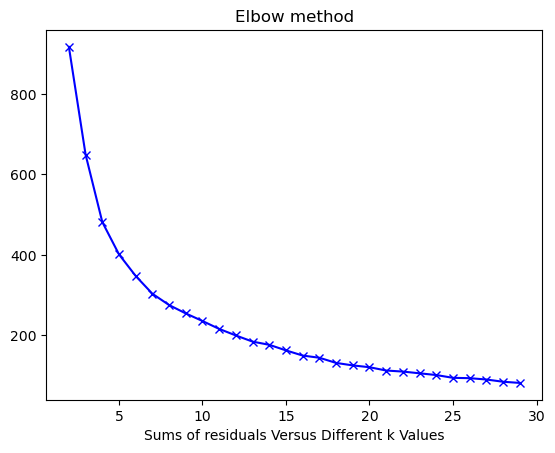

In [47]:
# write function and fit the clusters
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df5)
ssd = []  

K = range(2,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df5)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Sums of residuals Versus Different k Values")
plt.title("Elbow method")

C:\Users\zhuoxun.yang001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\zhuoxun.yang001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\zhuoxun.yang001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\zhuoxun.yang001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMea

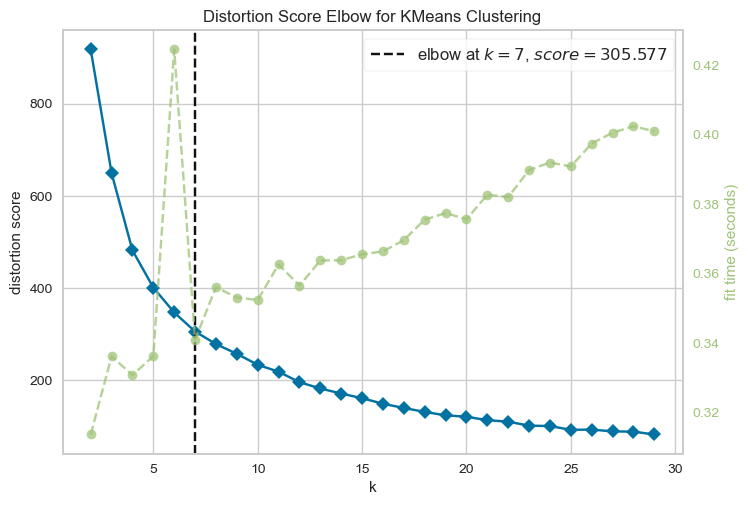

In [48]:
# import Elbow visualizer to visulize and to find the optimal number of k
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,30))
visu.fit(df5)
visu.poof();

In [49]:
# Use optimal k = 8 to fit model
kmeans = KMeans(n_clusters = 7).fit(df5)
kmeans_num = kmeans.labels_
pd.DataFrame({"投保人客户号": rfm.index, "聚类组": kmeans_num})

C:\Users\zhuoxun.yang001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


,投保人客户号,聚类组
0,C00000439821,4
1,C00000442492,2
2,C00000458038,3
3,C00000474142,4
4,C00000481321,2
5,C00000513354,2
6,C00000528260,3
7,C00000545398,2
8,C00000557564,3
9,C00000565448,4


In [50]:
# tranform index to index + 1 for visulize and readness
rfm["cluster_no"] = kmeans_num
rfm["cluster_no"] = rfm["cluster_no"] + 1
rfm.groupby("cluster_no").agg({"cluster_no":"count"})

,cluster_no
cluster_no,
1,211
2,156
3,511
4,542
5,369
6,356
7,382


In [51]:
# check the head
rfm.head(5)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,用户分类,cluster_no
投保人客户号,,,,,,,,,
C00000439821,251.00000,1,8955,3,1,4,314,0,5
C00000442492,4.00000,3,8882,5,5,4,554,6,3
C00000458038,483.00000,1,5710,1,1,3,113,2,4
C00000474142,277.00000,1,3058,3,1,1,311,0,5
C00000481321,194.00000,2,120100,4,3,5,435,8,3


In [52]:
# rename column and update immediately
rfm.rename(columns={'用户分类': 'Client_seg'}, inplace=True)
rfm.head(5)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Client_seg,cluster_no
投保人客户号,,,,,,,,,
C00000439821,251.00000,1,8955,3,1,4,314,0,5
C00000442492,4.00000,3,8882,5,5,4,554,6,3
C00000458038,483.00000,1,5710,1,1,3,113,2,4
C00000474142,277.00000,1,3058,3,1,1,311,0,5
C00000481321,194.00000,2,120100,4,3,5,435,8,3


In [53]:
import seaborn as sns
# import seaborn package alias as sns

<AxesSubplot:xlabel='Monetary', ylabel='cluster_no'>

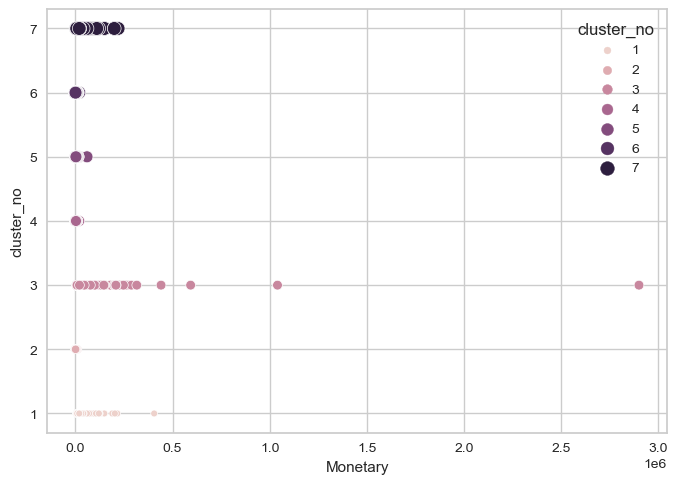

In [55]:
# apply seaborn to visulize the dataset with two dimensions, client_seg, cluster_no
sns.scatterplot(data=rfm, x="Monetary",y = "cluster_no", hue = "cluster_no", size = "cluster_no")
#  y="Client_seg", hue="cluster_no", hue_norm=(0, 7), legend="full"

In [ ]:
# ENCODEING BY ZHUOXUN.
# Few enhancements can be done by following:
# split the dataset; separate the response from others variables; cross-validation; removes the random effect; May increase the accuracy
# of the model by apply CUSUM to detect the outliers

In [56]:
# transform the encoder for machine learning binary value to categorical strings
to_encode = ["Client_seg"]
for col in to_encode:
    rfm[col] = le.inverse_transform(rfm[col])

In [57]:
# check the head of rfm model
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Client_seg,cluster_no
投保人客户号,,,,,,,,,
C00000439821,251.00000,1,8955,3,1,4,314,一般客户,5
C00000442492,4.00000,3,8882,5,5,4,554,重要价值客户_,3
C00000458038,483.00000,1,5710,1,1,3,113,休眠客户,4
C00000474142,277.00000,1,3058,3,1,1,311,一般客户,5
C00000481321,194.00000,2,120100,4,3,5,435,重要发展客户_,3


In [58]:
# filtered out the clients with required columns names and subset the categories
options = ["重要价值客户_", "重要发展客户_", "重要保持客户_", "重要挽留客户_", "流失客户_"]
rfm_filtered = rfm[rfm["Client_seg"].isin(options)]

In [59]:
# print rfm_filtered table with required columns
rfm_filtered

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Client_seg,cluster_no
投保人客户号,,,,,,,,,
C00000442492,4.00000,3,8882,5,5,4,554,重要价值客户_,3
C00000481321,194.00000,2,120100,4,3,5,435,重要发展客户_,3
C00000513354,11.00000,2,12790,5,3,4,534,重要发展客户_,3
C00000545398,78.00000,2,21720,5,3,5,535,重要发展客户_,3
C00000595372,249.00000,3,55415,3,5,5,355,重要保持客户_,1
C00000624603,55.00000,3,71810,5,5,5,555,重要价值客户_,3
C00000636405,241.00000,4,27239,4,5,5,455,重要保持客户_,3
C00000668807,216.00000,2,6230,4,3,3,433,重要发展客户_,6
C00000702851,237.00000,5,66945,4,5,5,455,重要保持客户_,3


In [60]:
# check the data shape of the table
rfm_filtered.shape

(1429, 9)

In [ ]:
# output the results save it in local path
output = 'C://Users//zhuoxun.yang001//Documents//fude//kmeans//rfm_clustering.xlsx'
rfm_filtered.to_excel(output)

In [ ]:
# DONE!!